# Parte A.p4

# 1. Configuraciones iniciales

## 1.1 Import de librerias

In [31]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from funpymodeling import status
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import hdbscan

In [2]:
# Configuraciones
pd.set_option('display.max_columns', None)

## 1.2 Lectura de datos

In [13]:
data = pd.read_csv("../data/ohe_customer_dataset.csv", sep=",")

In [14]:
data.head()

,transactionAmount,transactionFailed,fraudulent,"orderAmount_(9.999, 18.4]","orderAmount_(18.4, 30.0]","orderAmount_(30.0, 39.0]","orderAmount_(39.0, 47.0]","orderAmount_(47.0, 353.0]",orderAmount_unknown,orderState_failed,orderState_fulfilled,orderState_pending,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,paymentMethodIssuer_Bastion Banks,paymentMethodIssuer_Bulwark Trust Corp.,paymentMethodIssuer_Citizens First Banks,paymentMethodIssuer_Fountain Financial Inc.,paymentMethodIssuer_Grand Credit Corporation,paymentMethodIssuer_Her Majesty Trust,paymentMethodIssuer_His Majesty Bank Corp.,paymentMethodIssuer_Rose Bancshares,paymentMethodIssuer_Solace Banks,paymentMethodIssuer_Vertex Bancorp,paymentMethodIssuer_weird,emailDomain_biz,emailDomain_com,emailDomain_info,emailDomain_net,emailDomain_org,emailDomain_weird,emailProvider_gmail,emailProvider_hotmail,emailProvider_other,emailProvider_weird,emailProvider_yahoo,customerIPAdress_checked_long_address,customerIPAdress_checked_short_address,sameCity_no,sameCity_unknown,sameCity_yes
0,"(9.999, 22.0]",False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True
1,"(22.0, 34.0]",False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False
2,"(34.0, 46.0]",False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False
3,"(22.0, 34.0]",False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False
4,"(34.0, 46.0]",True,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False


Utilizamos columnas relevantes

In [17]:
filter_data = data[["orderState_failed", "orderState_fulfilled", "orderState_pending", "transactionFailed", "fraudulent", "customerIPAdress_checked_long_address"]].copy()

In [23]:
X = filter_data.drop(['fraudulent'], axis=1)
y = filter_data['fraudulent']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2) Clustering con K-means

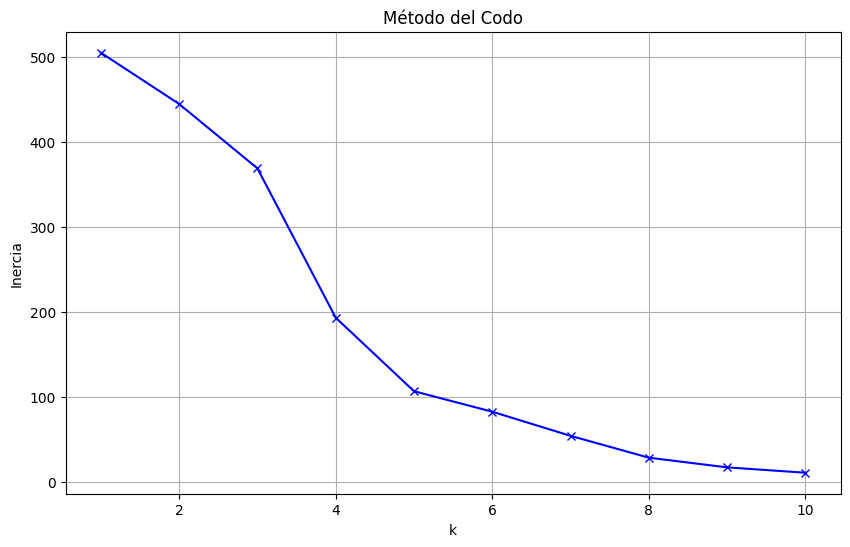

In [25]:
# Lista para almacenar la inercia (within-cluster sum of squares)
inertias = []

# Probar diferentes valores de k
K = range(1, 11)  # probar de 1 a 10 clusters

for k in K:
    # Crear y ajustar el modelo
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Guardar la inercia
    inertias.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()